In [34]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_recall_curve
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from time import time
from sklearn.feature_selection import RFE, SelectKBest,chi2

In [2]:
car_evaluation = fetch_ucirepo(id=19)
X = car_evaluation.data.features 
y = car_evaluation.data.targets

In [3]:
df = X
df['Output'] = y

In [4]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,Output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
Output      0
dtype: int64

In [6]:
le = LabelEncoder()
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('After Encoding')
    df[i] = le.fit_transform(df[i])
    print(i)
    print(df[i].unique())

buying
['vhigh' 'high' 'med' 'low']
After Encoding
buying
[3 0 2 1]
maint
['vhigh' 'high' 'med' 'low']
After Encoding
maint
[3 0 2 1]
doors
['2' '3' '4' '5more']
After Encoding
doors
[0 1 2 3]
persons
['2' '4' 'more']
After Encoding
persons
[0 1 2]
lug_boot
['small' 'med' 'big']
After Encoding
lug_boot
[2 1 0]
safety
['low' 'med' 'high']
After Encoding
safety
[1 2 0]
Output
['unacc' 'acc' 'vgood' 'good']
After Encoding
Output
[2 0 3 1]


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


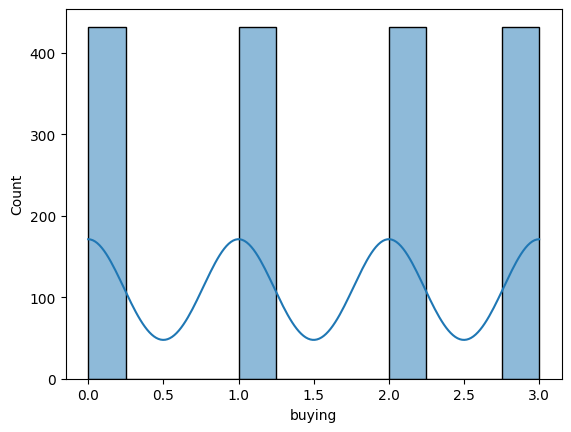

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


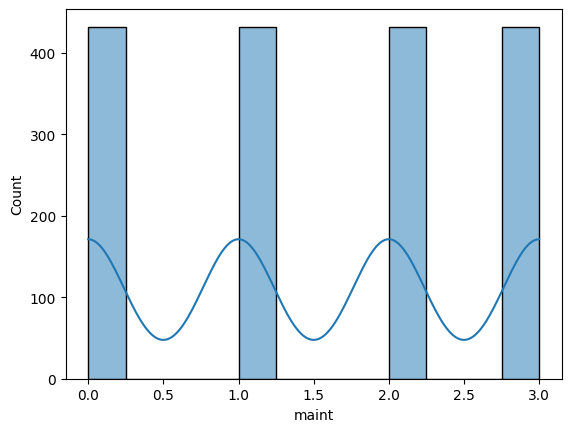

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


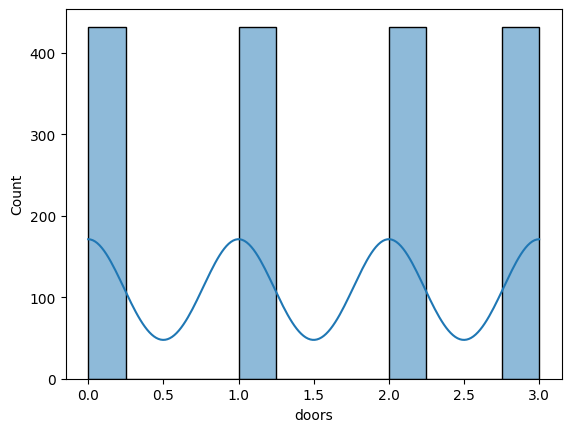

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


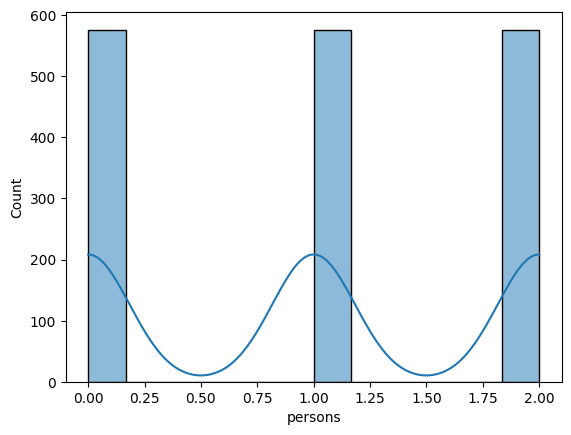

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


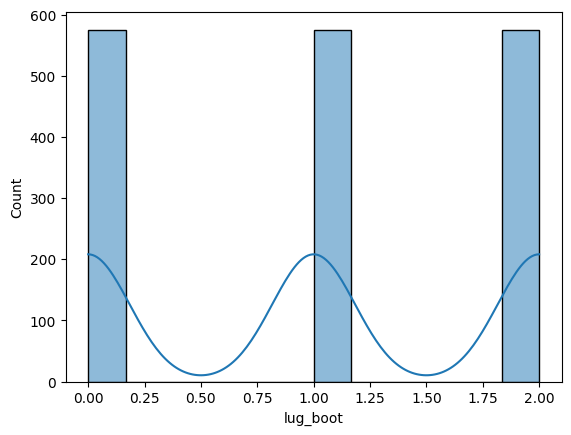

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


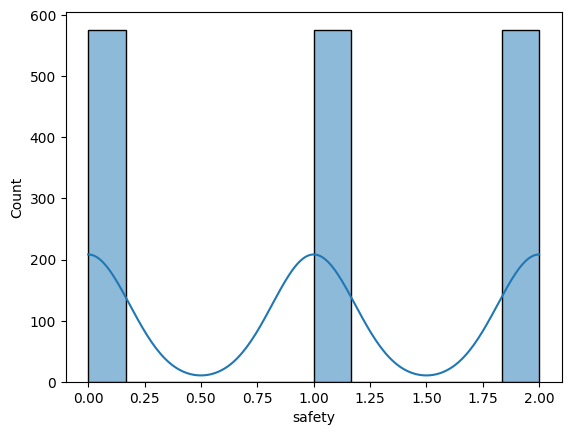

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


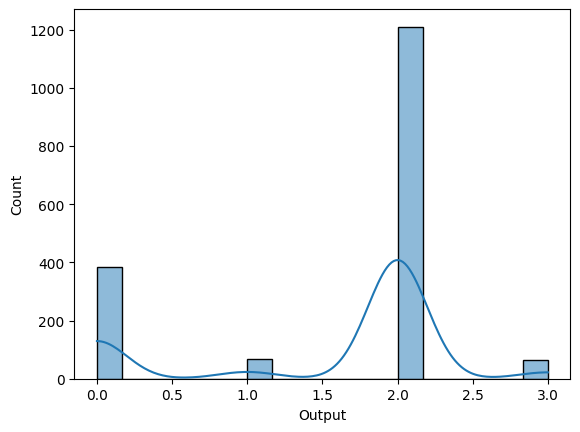

In [7]:
for i in df.columns:
    sns.histplot(df[i],kde=True)
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

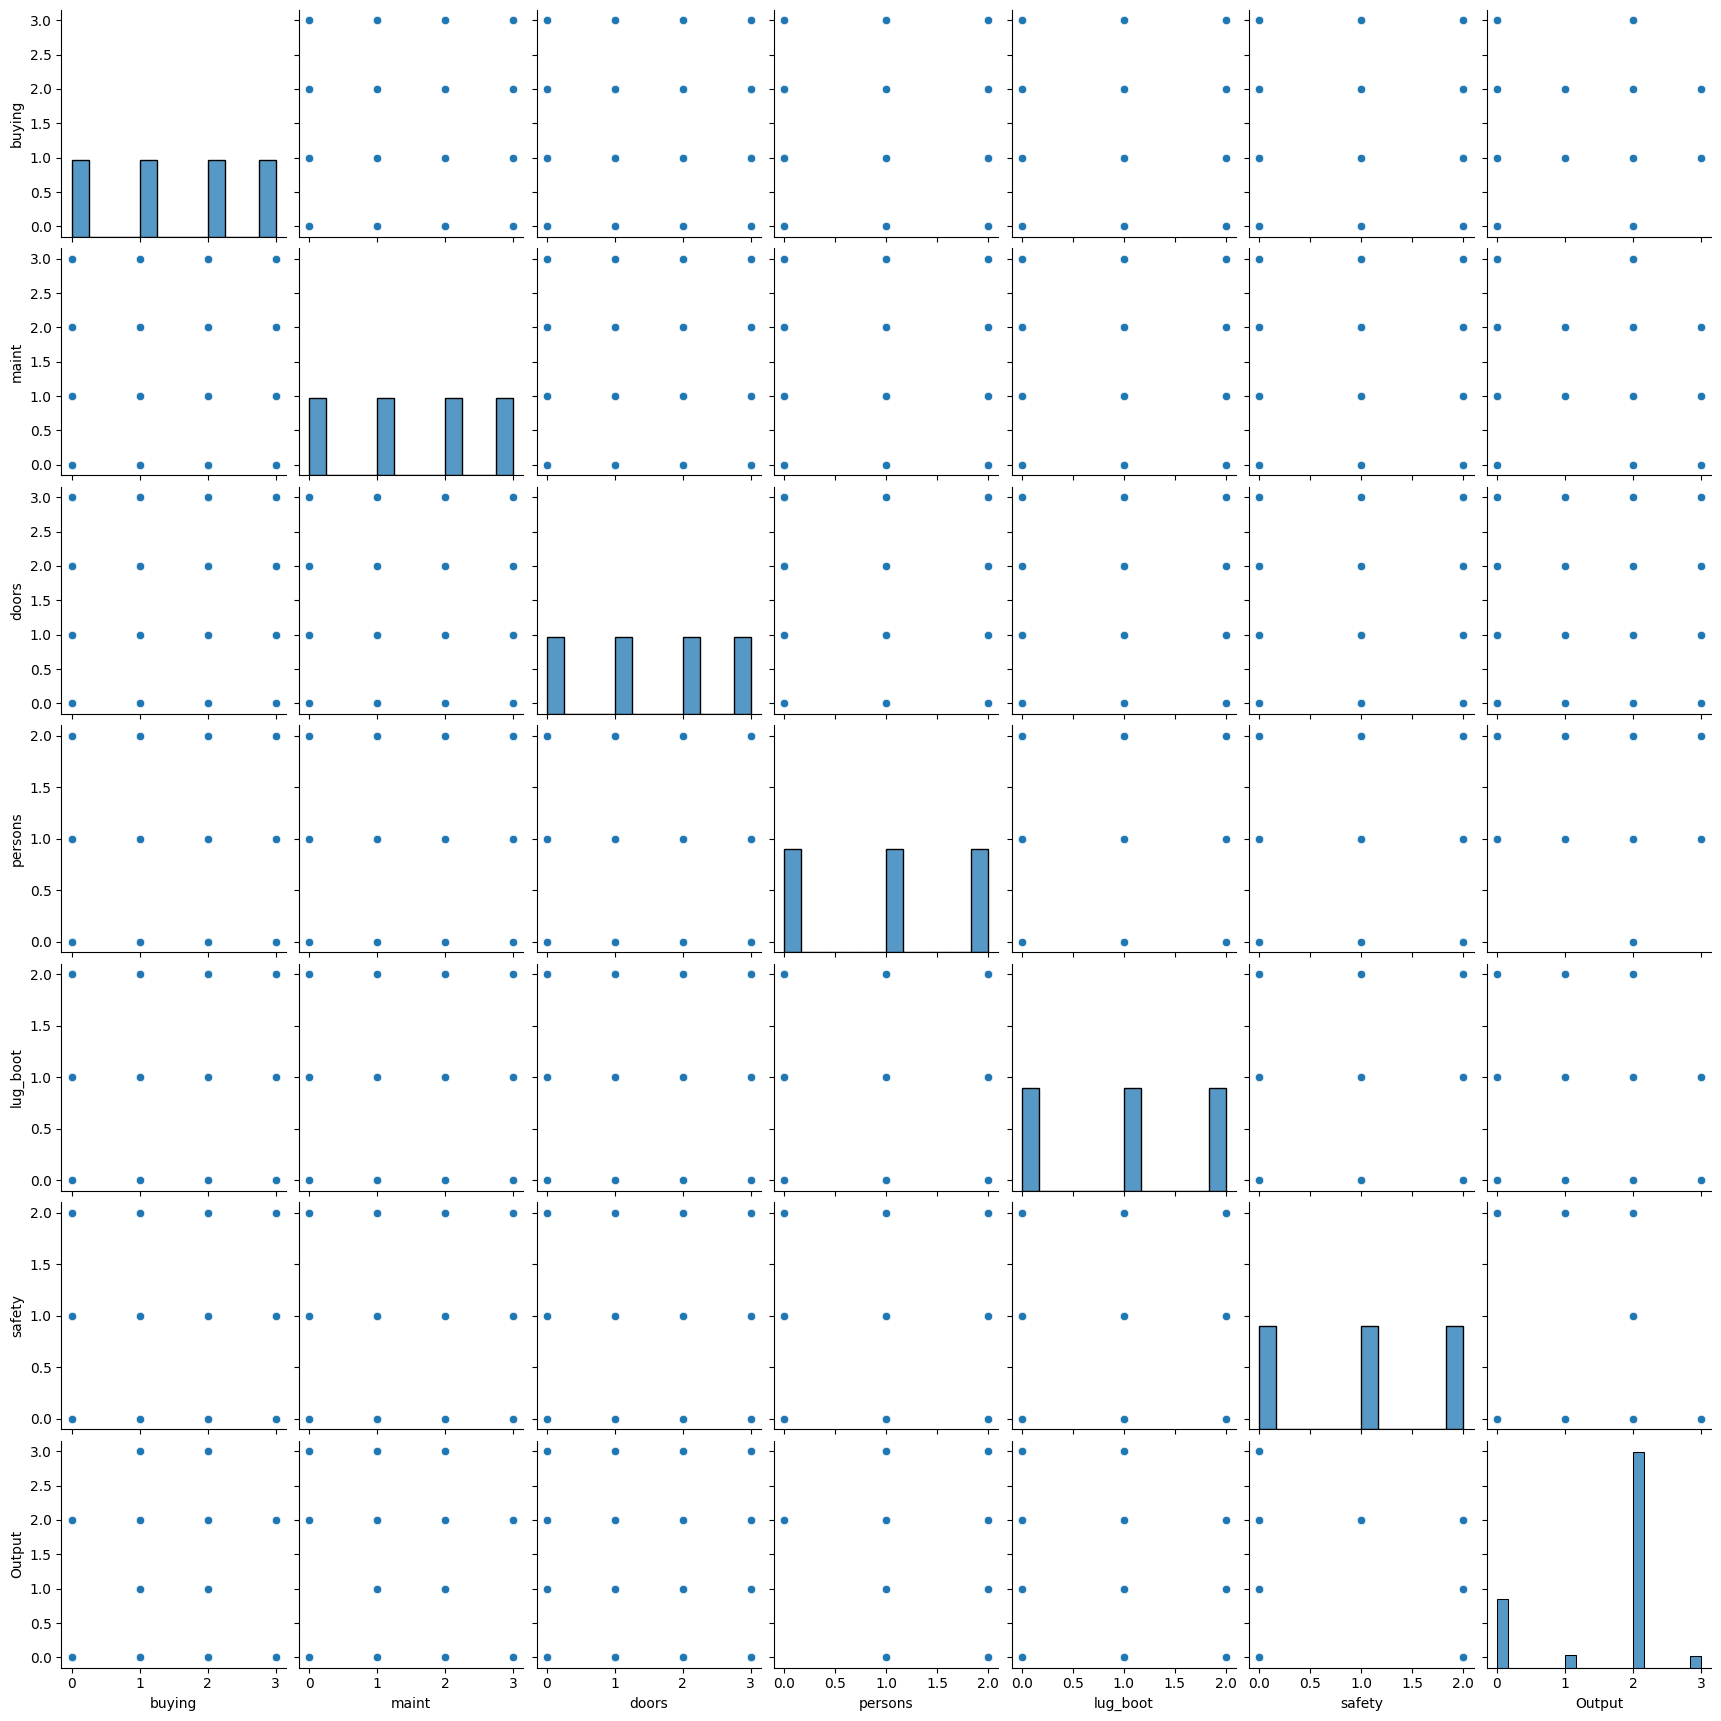

In [8]:
sns.pairplot(df)

<Axes: >

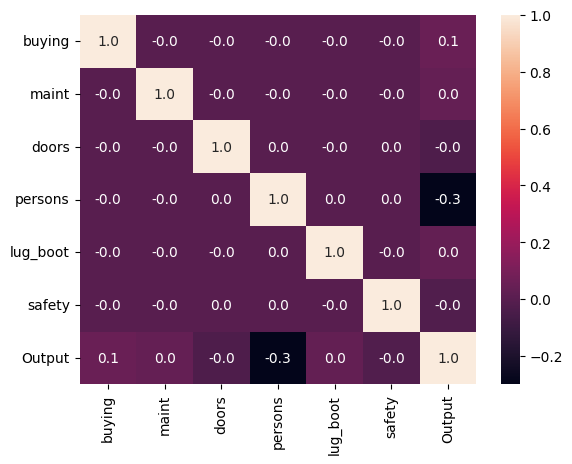

In [55]:
sns.heatmap(df.corr(), annot=True,  fmt=".1f")

In [9]:
X = df.drop('Output',axis=1)
y = df['Output']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [10]:
model = KNeighborsClassifier(n_neighbors=3)

In [11]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
y_pred = model.predict(X_test)

In [13]:
print('Accuracy: ',np.round(accuracy_score(y_test,y_pred)*100,2),'%')

Accuracy:  86.42 %


In [14]:
confusion_matrix(y_test,y_pred)

array([[ 57,   5,  21,   0],
       [  5,   6,   0,   0],
       [  5,   1, 229,   0],
       [  6,   3,   1,   7]], dtype=int64)

<Axes: >

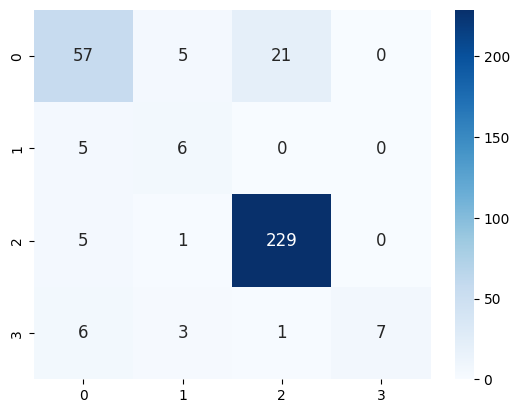

In [15]:
sns.heatmap(confusion_matrix(y_test,y_pred), cmap="Blues", annot=True,annot_kws={"size": 12},fmt='')

In [16]:
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred)
print("Precision \n", precision)
print("\nRecall \n", recall)
print("\nF-score \n", fscore)

Precision 
 [0.78082192 0.4        0.9123506  1.        ]

Recall 
 [0.68674699 0.54545455 0.97446809 0.41176471]

F-score 
 [0.73076923 0.46153846 0.94238683 0.58333333]


In [17]:
print('Accuracy: ',np.round(accuracy_score(y_test,y_pred)*100),'%')

Accuracy:  86.0 %


In [58]:
class KNN:
    def __init__(self):
        self.n = 3

    def __init__(self, df:pd.DataFrame,n:int):
        self.X = df.drop('Output',axis=1)
        self.y = df['Output']
        self.n = n
        self.train_time = 0
        
    def setData(self,df):
        self.X = df.drop('Output',axis=1)
        self.y = df['Output']
    
    def setX(self,X):
        self.X = X

    def setY(self,y):
        self.Y = Y

    def getModel(self):
        return self.model

    def splitData(self,train_size=0.8,random_state=42):
        X_train,X_test,y_train,y_test = train_test_split(self.X,self.y,random_state=random_state,train_size=train_size)
        self.X_test = X_test
        self.X_train = X_train
        self.y_train = y_train
        self.y_test = y_test
    
    def fit(self,test_size=0.2):
        tim1 = time() 
        self.splitData()
        model = KNeighborsClassifier(n_neighbors=self.n)
        print(X_train.shape)
        model.fit(X_train,y_train)
        self.model = model
        tim2 = time()
        self.train_time = (tim2 - tim1) # Seconds
        

    def predict(self,X_test):
        return self.model.predict(X_test)
    
    def get_confusion_matrix(self):
        plt.title("Confusion Matrix for "+ str(n)+" neighbors")
        sns.heatmap(confusion_matrix(self.y_test,self.predict(self.X_test)), cmap="Blues", annot=True,fmt='')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.show()

    def getTime(self):
        print("Time required for training: ",self.train_time,"seconds")
        return self.train_time
    
    def get_accuracy(self):
        print('Accuracy: ',np.round(accuracy_score(self.y_test,self.predict(self.X_test))*100),'%')
        return np.round(accuracy_score(self.y_test,self.predict(self.X_test))*100)

In [19]:
n_neighbors = np.arange(1,20,dtype=int)
times = []
accs = []
error_rate = []
for i in n_neighbors:
    print('neighbors: ',i)
    k = KNN(df,i)
    k.fit()
    accs.append(100 - k.get_accuracy())
    times.append(k.getTime())
    pred_i = k.predict(k.X_test)
    error_rate.append(np.mean(pred_i != k.y_test))

neighbors:  1
Accuracy:  80.0 %
Time required for training:  0.013059377670288086 seconds
neighbors:  2
Accuracy:  77.0 %
Time required for training:  0.009225606918334961 seconds
neighbors:  3
Accuracy:  86.0 %
Time required for training:  0.010614395141601562 seconds
neighbors:  4
Accuracy:  86.0 %
Time required for training:  0.008366584777832031 seconds
neighbors:  5
Accuracy:  89.0 %
Time required for training:  0.008512258529663086 seconds
neighbors:  6
Accuracy:  91.0 %
Time required for training:  0.009758472442626953 seconds
neighbors:  7
Accuracy:  92.0 %
Time required for training:  0.007825613021850586 seconds
neighbors:  8
Accuracy:  92.0 %
Time required for training:  0.011619091033935547 seconds
neighbors:  9
Accuracy:  91.0 %
Time required for training:  0.008545160293579102 seconds
neighbors:  10
Accuracy:  88.0 %
Time required for training:  0.010719537734985352 seconds
neighbors:  11
Accuracy:  87.0 %
Time required for training:  0.007550716400146484 seconds
neighbor

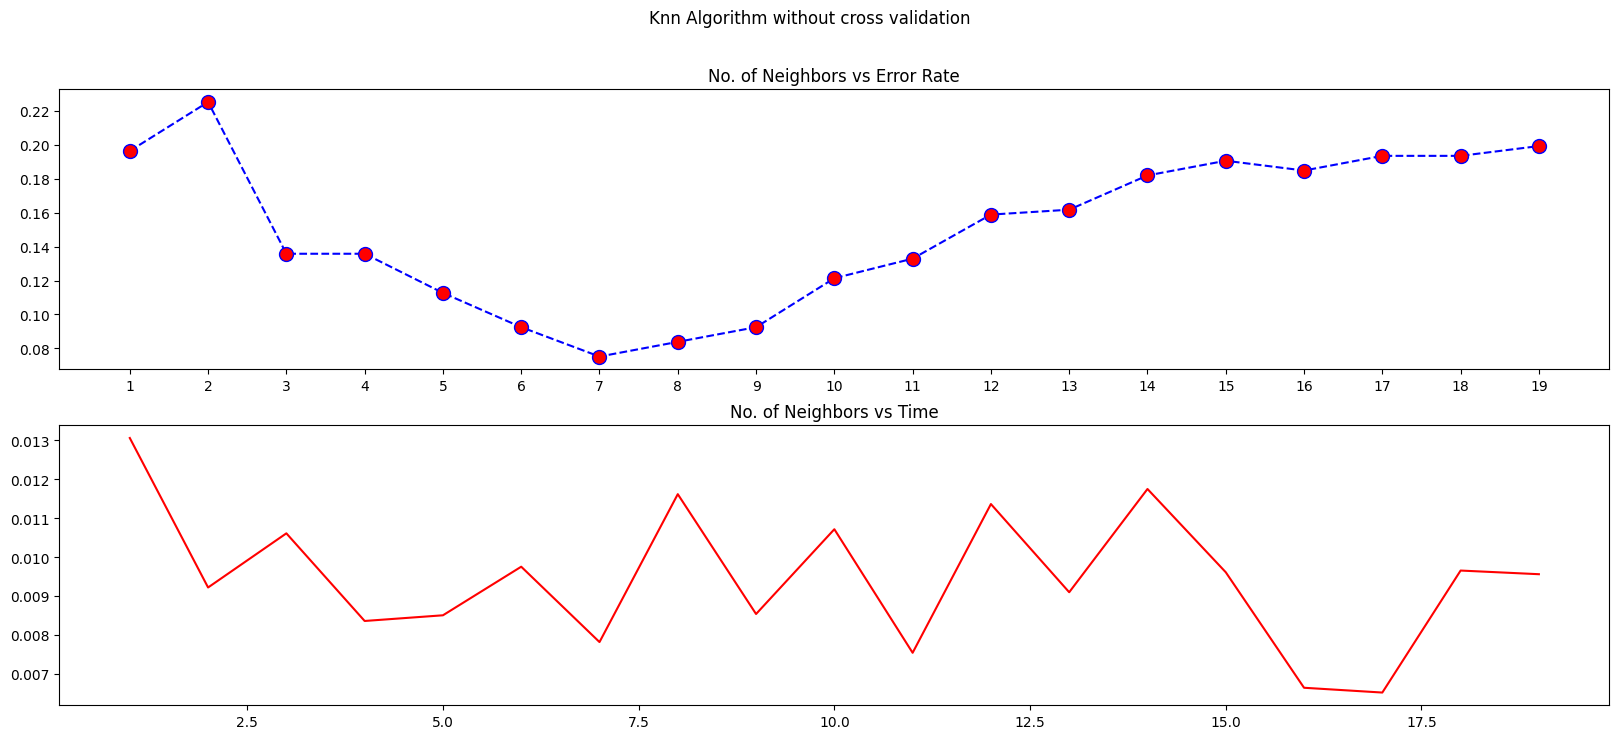

In [20]:
plt.figure(figsize=(20,8))
plt.suptitle('Knn Algorithm without cross validation')
plt.subplot(2,1,1)
plt.title('No. of Neighbors vs Error Rate')
plt.plot(n_neighbors,error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xticks(n_neighbors)
plt.subplot(2,1,2)
plt.title('No. of Neighbors vs Time')
plt.plot(n_neighbors,times,c='r')
plt.show()

In [21]:
def cv(k):
    accuracy_rate = []
    error_rate = []
    cv_time = []
    for i in range (1,40):
        t1 = time()
        knn = KNeighborsClassifier(n_neighbors=i)
        score = cross_val_score(knn,X,y,cv=5)
        accuracy_rate.append(score.mean())
        error_rate.append(1-score.mean())
        t2 = time()
        cv_time.append(t2-t1)
    return accuracy_rate,error_rate,cv_time

In [22]:
ks = [2,5,7,10,12,15]

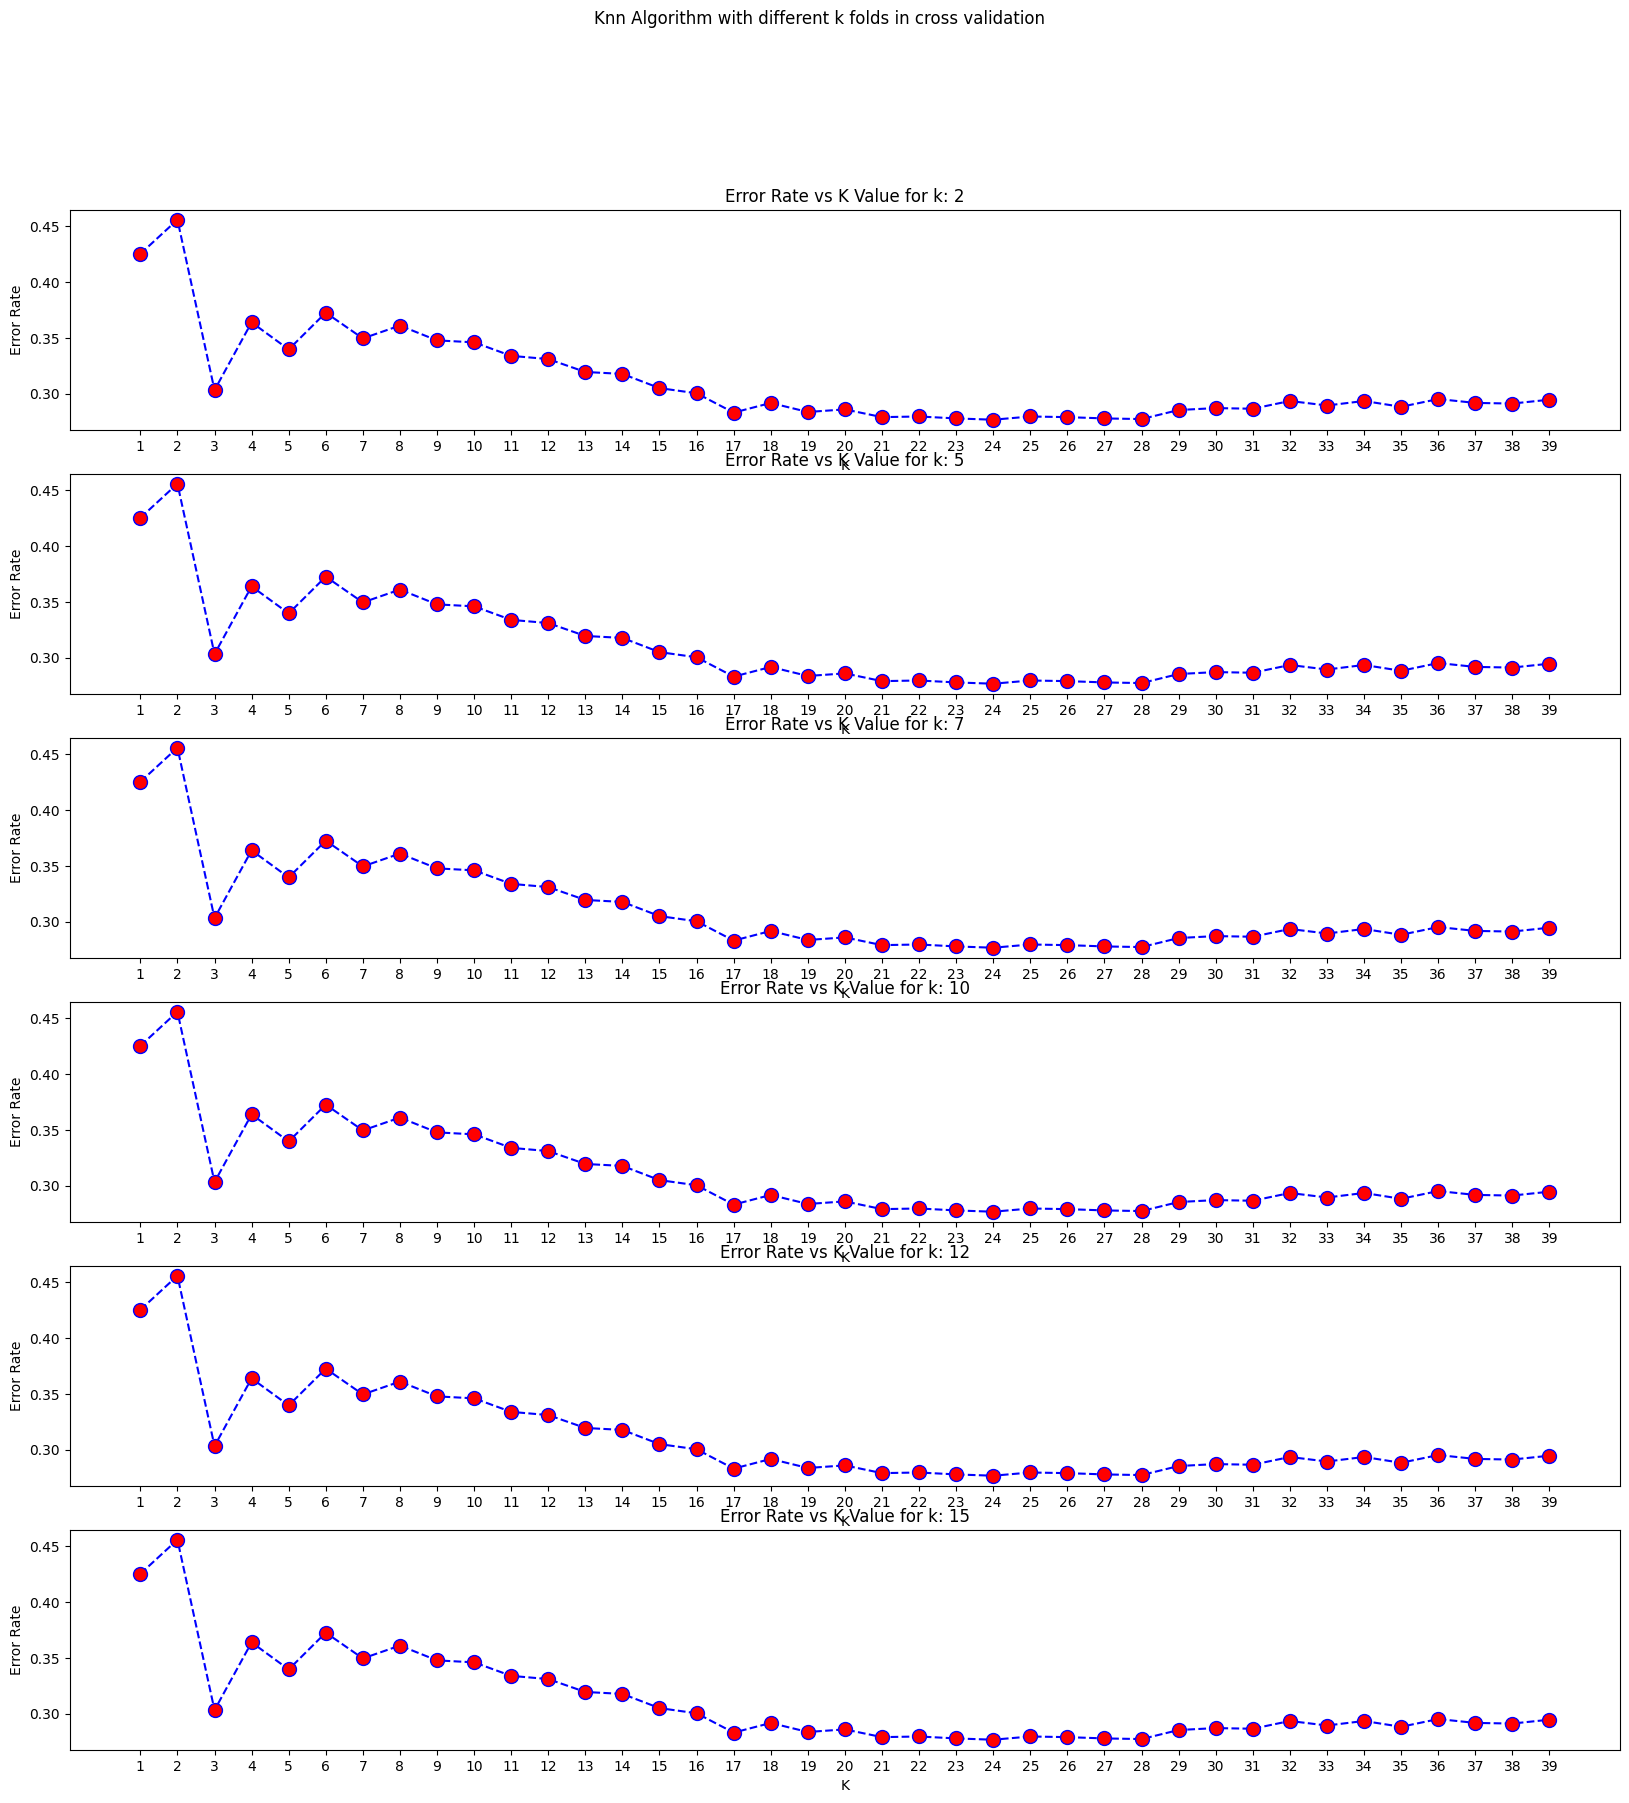

In [23]:
plt.figure(figsize=(20,20))
plt.suptitle('Knn Algorithm with different k folds in cross validation')
for i in range(len(ks)):
    accuracy_rate,error_rate,_ = cv(ks[i])
    plt.subplot(len(ks),1,i+1)
    plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
    plt.title('Error Rate vs K Value for k: '+str(ks[i]))
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.xticks(range(1,40))
plt.show()

In [24]:
knn_cv = KNeighborsClassifier(n_neighbors=7)
cv_scores = cross_val_score(knn_cv, X, y, cv=10)
print(cv_scores)
print("Mean: ",np.mean(cv_scores))

[0.56647399 0.64739884 0.72254335 0.67052023 0.69364162 0.69364162
 0.67052023 0.82080925 0.9127907  0.8255814 ]
Mean:  0.7223921225971233


In [25]:
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 15,dtype=int)}
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [26]:
knn_gscv.best_params_

{'n_neighbors': 3}

In [27]:
np.round((knn_gscv.best_score_)*100,2)

69.69

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73        83
           1       0.40      0.55      0.46        11
           2       0.91      0.97      0.94       235
           3       1.00      0.41      0.58        17

    accuracy                           0.86       346
   macro avg       0.77      0.65      0.68       346
weighted avg       0.87      0.86      0.86       346



C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

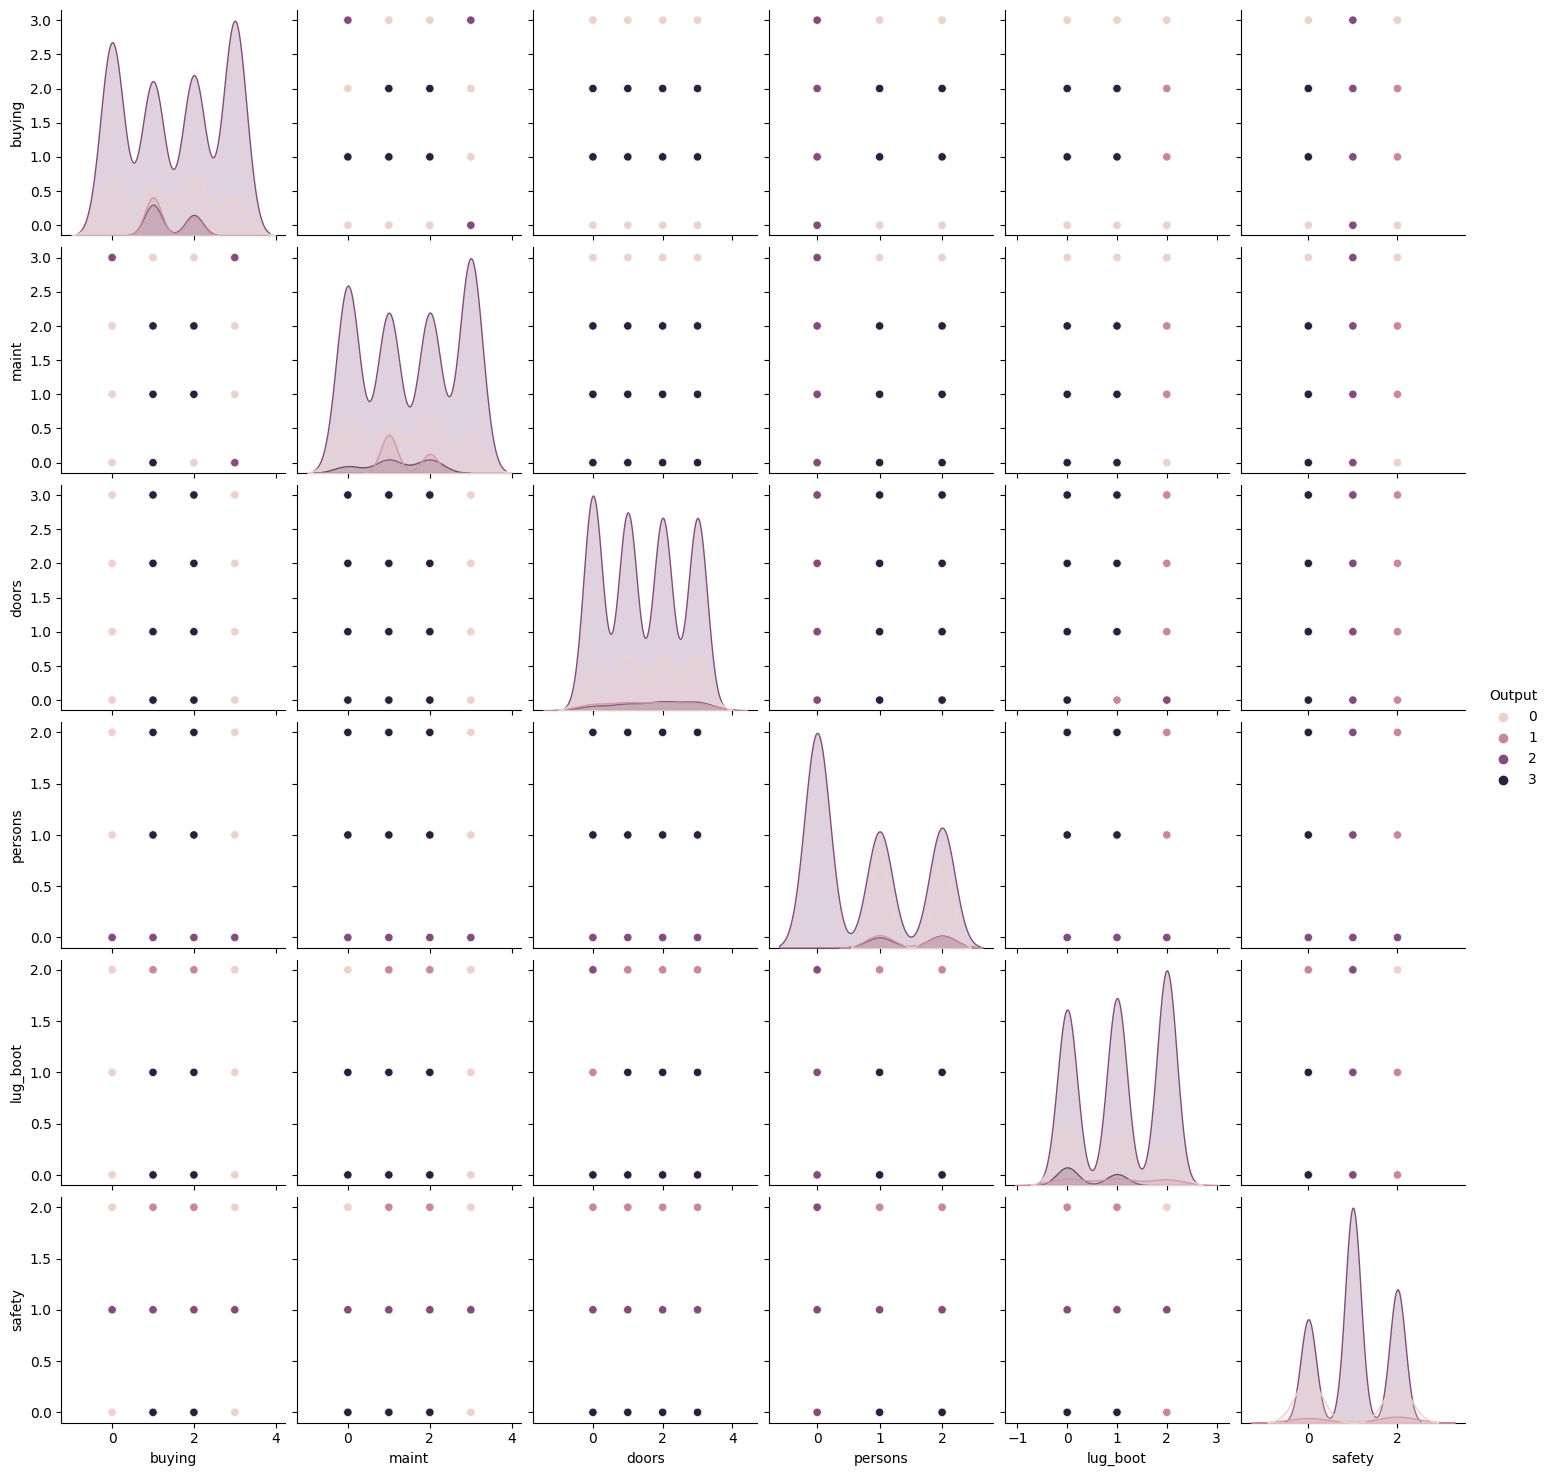

In [29]:
sns.pairplot(df,hue='Output')

sns.boxplot(df)

## feature Selection

In [52]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'Output'], dtype='object')

### For all

<Axes: >

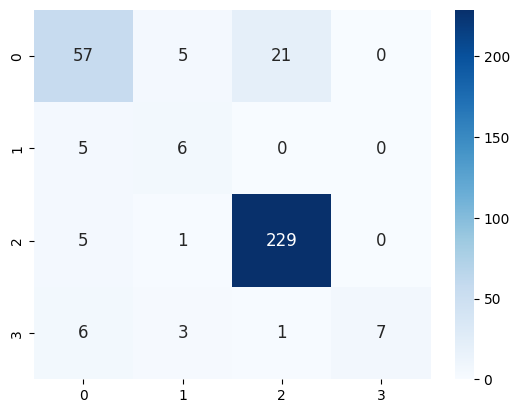

In [69]:
X = df.drop('Output',axis=1)
y = df['Output']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred), cmap="Blues", annot=True,annot_kws={"size": 12},fmt='')

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73        83
           1       0.40      0.55      0.46        11
           2       0.91      0.97      0.94       235
           3       1.00      0.41      0.58        17

    accuracy                           0.86       346
   macro avg       0.77      0.65      0.68       346
weighted avg       0.87      0.86      0.86       346



In [71]:
accuracy_score(y_test, y_pred)*100

86.41618497109826

### for 4

In [66]:
df_4 = df[['buying', 'persons', 'lug_boot', 'safety', 'Output']]

<Axes: >

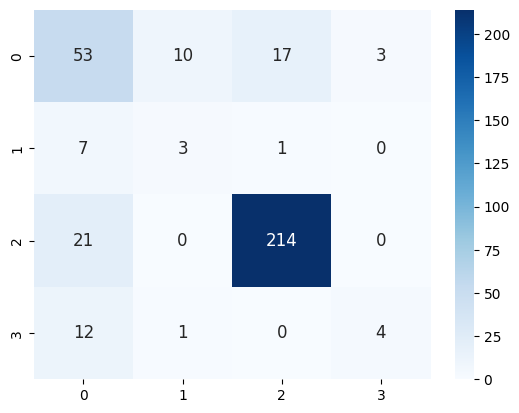

In [72]:
X = df_4.drop('Output',axis=1)
y = df_4['Output']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred), cmap="Blues", annot=True,annot_kws={"size": 12},fmt='')

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.64      0.60        83
           1       0.21      0.27      0.24        11
           2       0.92      0.91      0.92       235
           3       0.57      0.24      0.33        17

    accuracy                           0.79       346
   macro avg       0.57      0.51      0.52       346
weighted avg       0.80      0.79      0.79       346



In [74]:
accuracy_score(y_test, y_pred)*100

79.1907514450867

### for 3

In [75]:
df_3 = df[['persons', 'lug_boot', 'safety', 'Output']]

<Axes: >

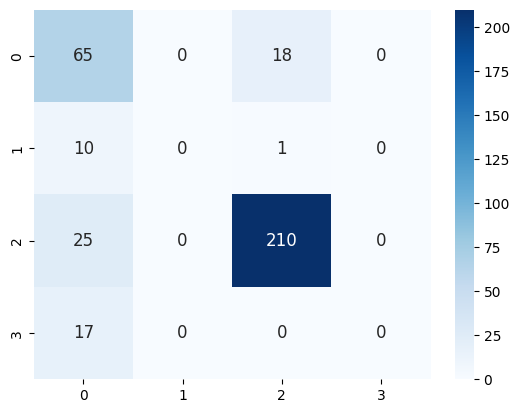

In [76]:
X = df_3.drop('Output',axis=1)
y = df_3['Output']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred), cmap="Blues", annot=True,annot_kws={"size": 12},fmt='')

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.78      0.65        83
           1       0.00      0.00      0.00        11
           2       0.92      0.89      0.91       235
           3       0.00      0.00      0.00        17

    accuracy                           0.79       346
   macro avg       0.37      0.42      0.39       346
weighted avg       0.76      0.79      0.77       346



C:\Users\YASH PATEL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YASH PATEL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YASH PATEL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [78]:
accuracy_score(y_test, y_pred)*100

79.47976878612717

### for 2

In [80]:
df_2 = df[['persons', 'safety', 'Output']]

<Axes: >

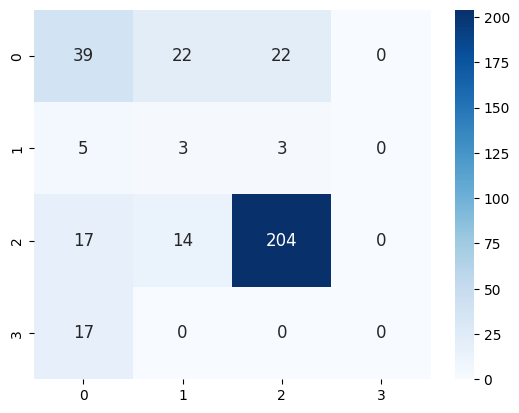

In [81]:
X = df_2.drop('Output',axis=1)
y = df_2['Output']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred), cmap="Blues", annot=True,annot_kws={"size": 12},fmt='')

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.47      0.48        83
           1       0.08      0.27      0.12        11
           2       0.89      0.87      0.88       235
           3       0.00      0.00      0.00        17

    accuracy                           0.71       346
   macro avg       0.37      0.40      0.37       346
weighted avg       0.73      0.71      0.72       346



C:\Users\YASH PATEL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YASH PATEL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YASH PATEL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [83]:
accuracy_score(y_test, y_pred)*100

71.09826589595376